# Importando librerías

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import matplotlib.patches as patches
from PIL import Image

import cv2

# Revisando los labels de train

In [2]:
df = pd.read_csv('../input/histopathologic-cancer-detection/train_labels.csv')

df['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [3]:
cancer_positive = df[df["label"] == 1].sample(5)['id']


cancer_negative = df[df["label"] == 0].sample(5)['id']


In [4]:
def readImage(path):
    # OpenCV reads the image in bgr format by default
    bgr_img = cv2.imread(path)
    # We flip it to rgb for visualization purposes
    b,g,r = cv2.split(bgr_img)
    rgb_img = cv2.merge([r,g,b])
    return rgb_img



Text(0, 0.5, 'Tumor tissue samples')

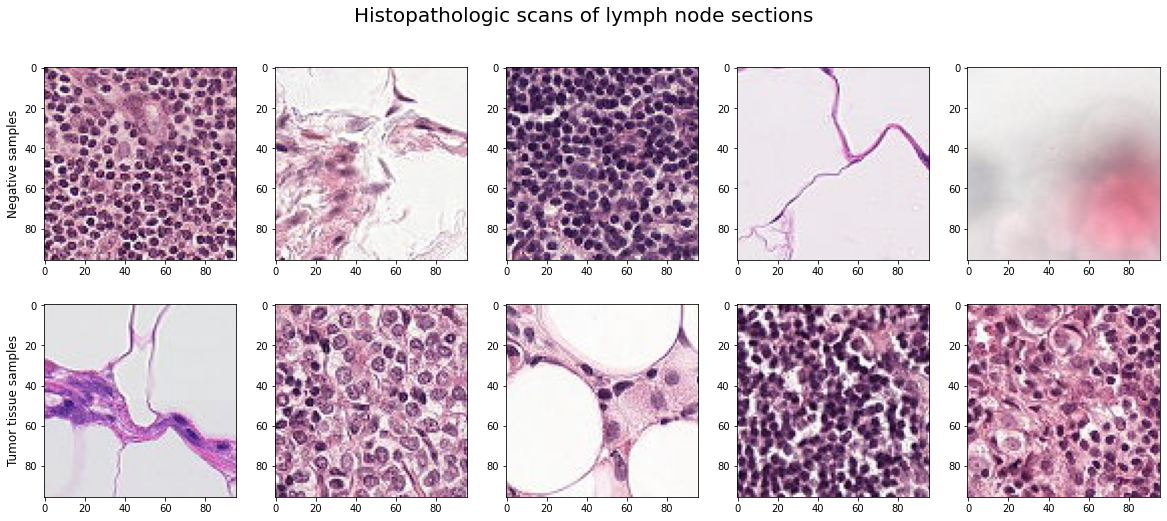

In [5]:

fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('Histopathologic scans of lymph node sections',fontsize=20)
dir = '../input/histopathologic-cancer-detection'

# Negatives
for i, idx in enumerate(cancer_negative):
    path = os.path.join(dir, 'train', idx)
    ax[0,i].imshow(readImage(path + '.tif'))
    
ax[0,0].set_ylabel('Negative samples', size='large')

# Positives
for i, idx in enumerate(cancer_positive):
    path = os.path.join(dir, 'train', idx)
    ax[1,i].imshow(readImage(path + '.tif'))
    
ax[1,0].set_ylabel('Tumor tissue samples', size='large')